In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models , Input
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Model


In [6]:
# Load the training dataset
train_file_path = r"E:\Training\Teknosoft\MNIST Dataset\train.csv"
train_data = pd.read_csv(train_file_path)
train_data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Load the testing dataset
test_file_path = r"E:\Training\Teknosoft\MNIST Dataset\test.csv"
test_data = pd.read_csv(test_file_path)
test_data

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Separate features and labels
X_train = train_data.drop(columns=["label"]).values.astype('float32')  
y_train = train_data['label'].values  
X_test = test_data.values.astype('float32')  

In [9]:
# Normalize pixel values
X_train /= 255.0
X_test /= 255.0

In [10]:
# Reshape images
X_train = X_train.reshape(-1, 28, 28, 1)  
X_test = X_test.reshape(-1, 28, 28, 1)  

In [12]:
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
# Split the Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [18]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1050/1050 [==============================] - 24s 21ms/step - loss: 0.2055 - accuracy: 0.9367 - val_loss: 0.1017 - val_accuracy: 0.9687
Epoch 2/10
1050/1050 [==============================] - 22s 21ms/step - loss: 0.0617 - accuracy: 0.9807 - val_loss: 0.0527 - val_accuracy: 0.9843
Epoch 3/10
1050/1050 [==============================] - 21s 20ms/step - loss: 0.0437 - accuracy: 0.9859 - val_loss: 0.0389 - val_accuracy: 0.9869
Epoch 4/10
1050/1050 [==============================] - 22s 21ms/step - loss: 0.0333 - accuracy: 0.9894 - val_loss: 0.0362 - val_accuracy: 0.9881
Epoch 5/10
1050/1050 [==============================] - 22s 21ms/step - loss: 0.0264 - accuracy: 0.9912 - val_loss: 0.0437 - val_accuracy: 0.9856
Epoch 6/10
1050/1050 [==============================] - 21s 20ms/step - loss: 0.0212 - accuracy: 0.9934 - val_loss: 0.0368 - val_accuracy: 0.9874
Epoch 7/10
1050/1050 [==============================] - 22s 21ms/step - loss: 0.0166 - accuracy: 0.9947 - val_loss: 0.0358 -

In [20]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Confusion matrix
y_pred = np.argmax(model.predict(X_test), axis=-1)
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(cm)

263/263 [==============================] - 3s 10ms/step - loss: 0.0362 - accuracy: 0.9898
Test accuracy: 0.9897618889808655
263/263 [==============================] - 2s 9ms/step
Confusion matrix:
[[810   0   2   0   2   0   1   0   0   1]
 [  0 904   2   0   0   0   1   1   1   0]
 [  0   0 841   0   2   0   1   0   2   0]
 [  0   0   4 925   0   3   0   1   3   1]
 [  1   0   0   0 829   0   4   2   0   3]
 [  1   1   0   2   0 690   5   0   3   0]
 [  0   0   0   0   0   1 784   0   0   0]
 [  0   1   4   0   1   0   0 886   0   1]
 [  0   2   2   0   2   0   0   0 829   0]
 [  1   1   0   1  13   0   0   4   2 816]]


In [28]:
# Use the Model to Predict Labels for Test Data
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Print the predicted labels
print("Predicted labels for test data:")
print(predicted_labels)

263/263 [==============================] - 2s 7ms/step
Predicted labels for test data:
[8 1 9 ... 3 0 9]


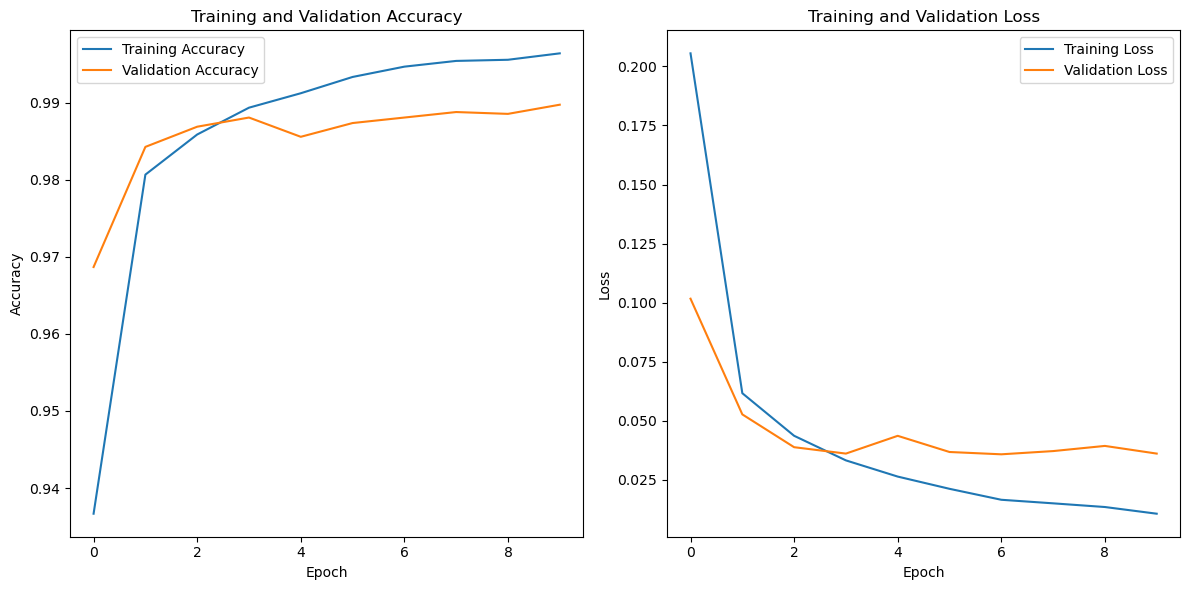

In [21]:
# Plot training history
def plot_history(history):
    plt.figure(figsize=(12, 6))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot training history
plot_history(history)

1/1 [==============================] - 0s 34ms/step


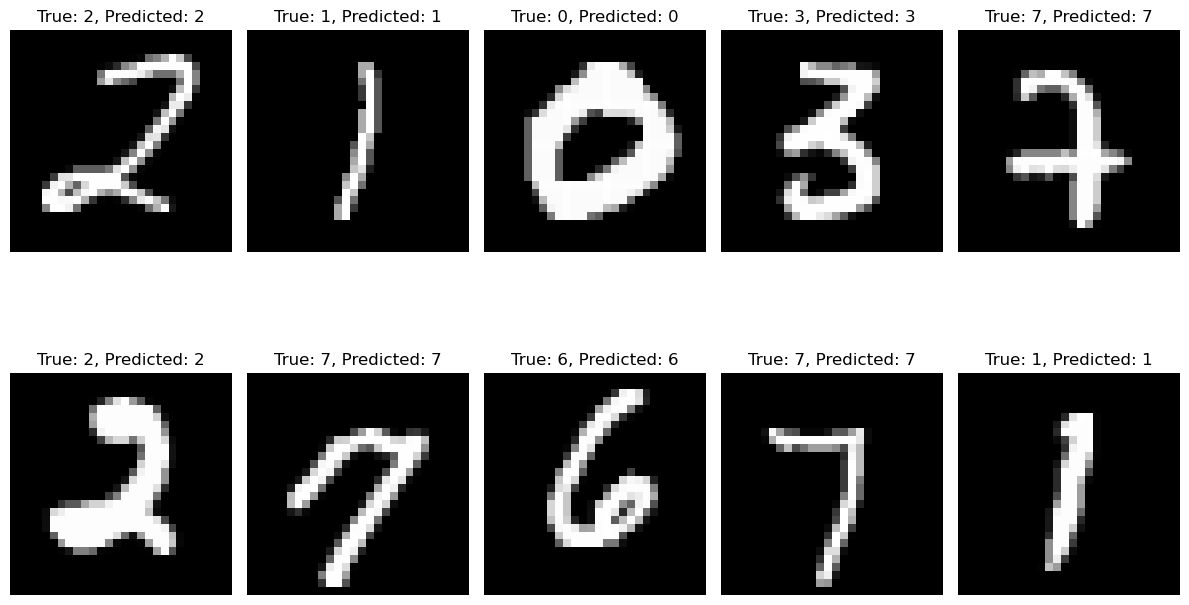

In [27]:
# Select random samples from the test set
num_samples = 10
random_indices = np.random.choice(len(X_test), num_samples, replace=False)
sample_images = X_test[random_indices]
sample_labels = y_test[random_indices]

# Predict labels for the samples
predicted_labels = np.argmax(model.predict(sample_images), axis=-1)

# Plot the samples with their true and predicted labels
plt.figure(figsize=(12, 8))
for i in range(num_samples):
    plt.subplot(2, 5, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'True: {sample_labels[i]}, Predicted: {predicted_labels[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

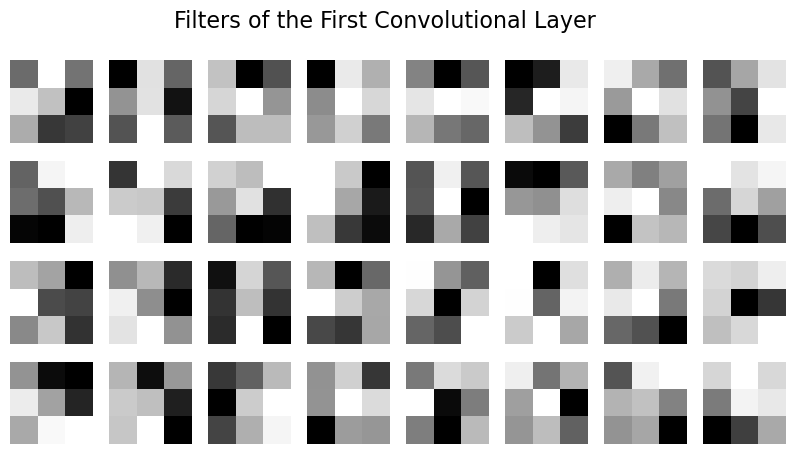

In [31]:
# Get the weights of the first convolutional layer
conv1_weights = model.layers[0].get_weights()[0]

# Plot the filters
plt.figure(figsize=(10, 5))
for i in range(32):
    plt.subplot(4, 8, i + 1)
    plt.imshow(conv1_weights[:, :, 0, i], cmap='gray')
    plt.axis('off')

plt.suptitle('Filters of the First Convolutional Layer', fontsize=16)
plt.show()

1/1 [==============================] - 0s 145ms/step


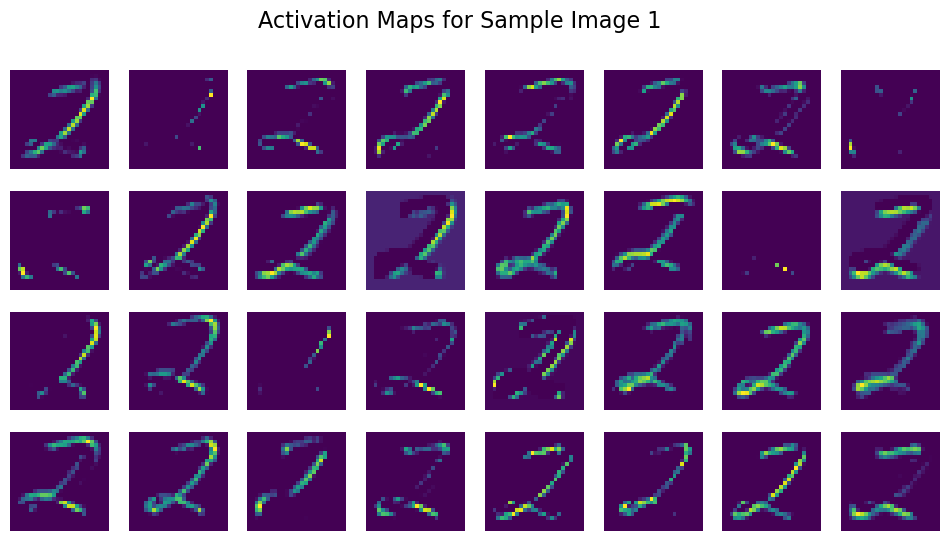

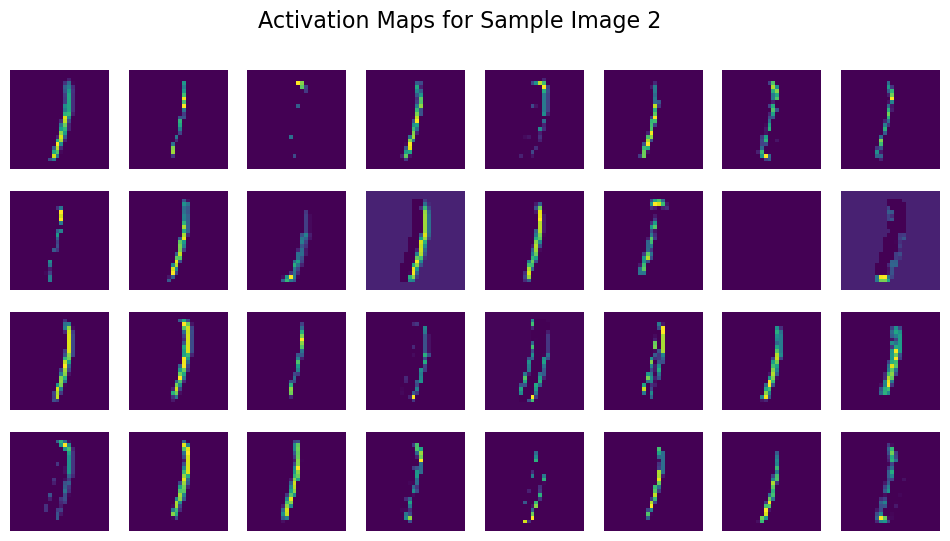

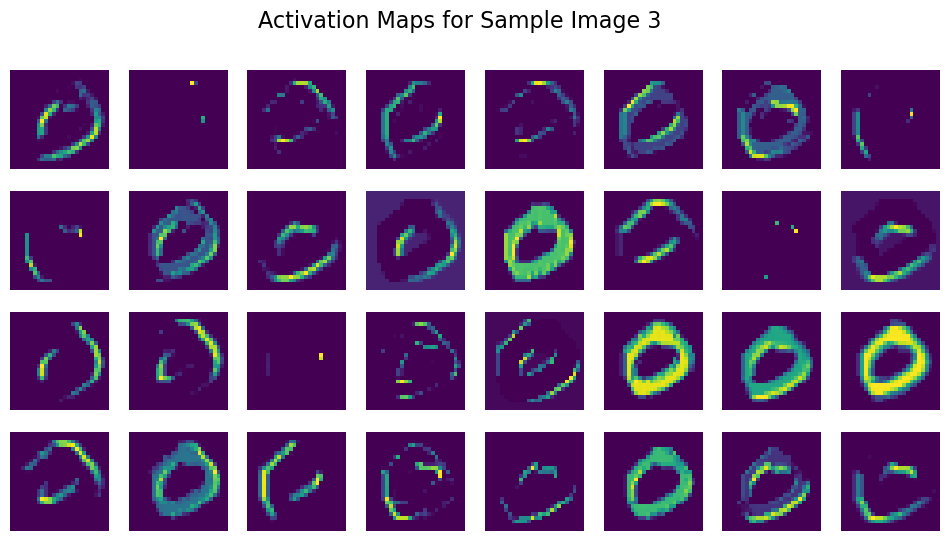

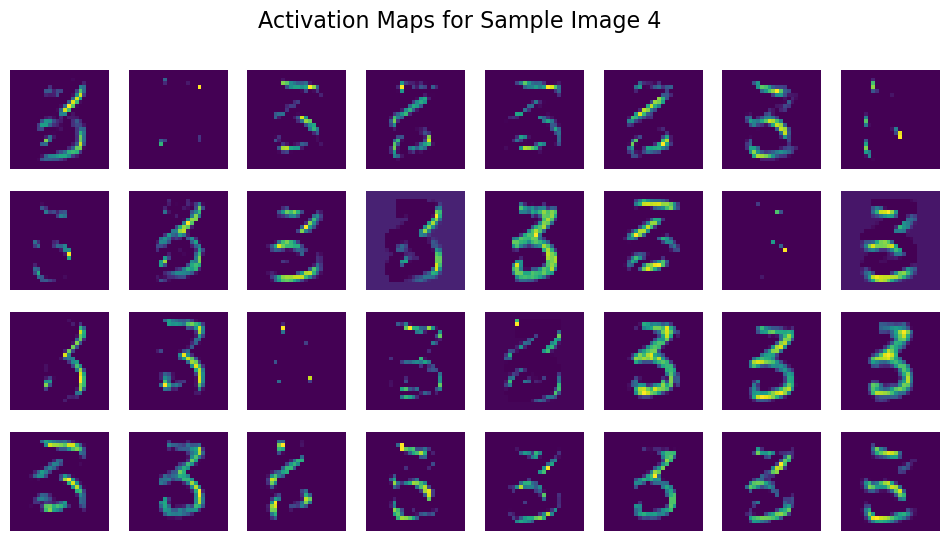

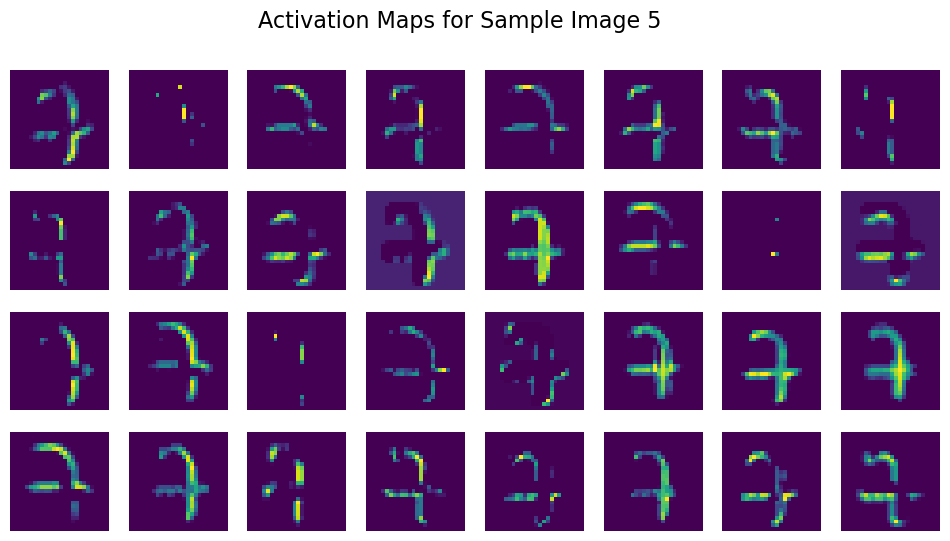

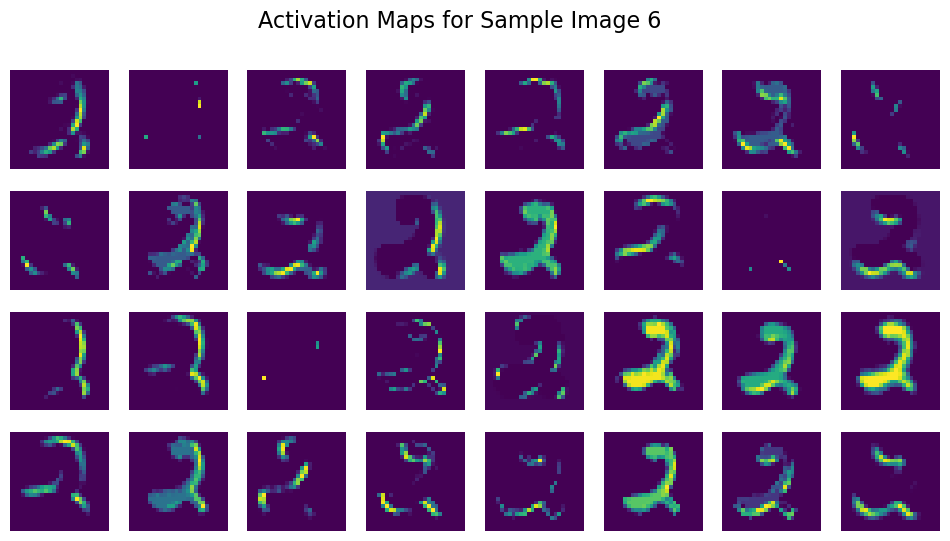

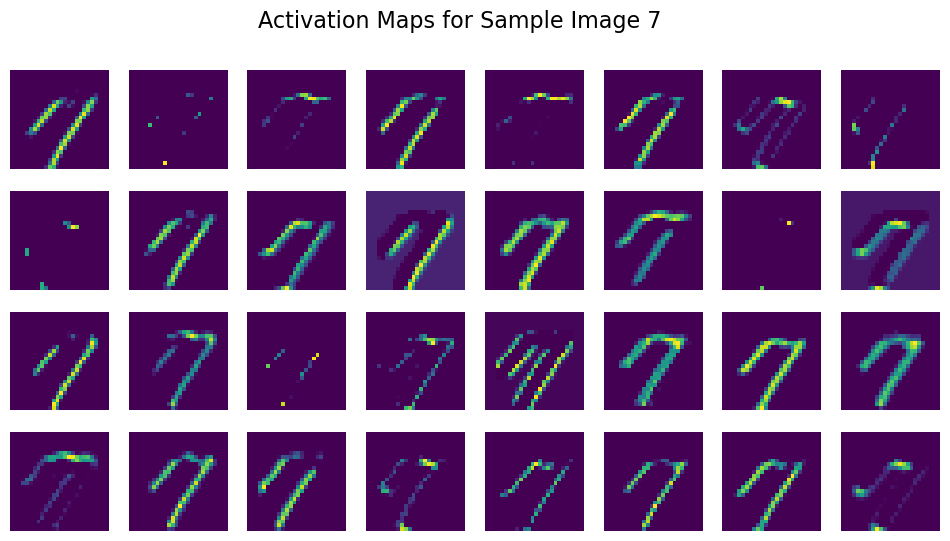

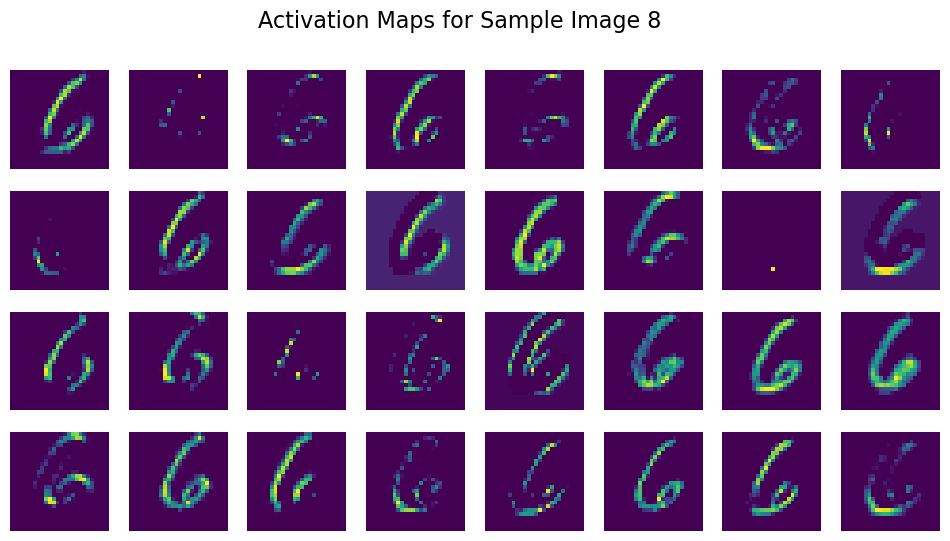

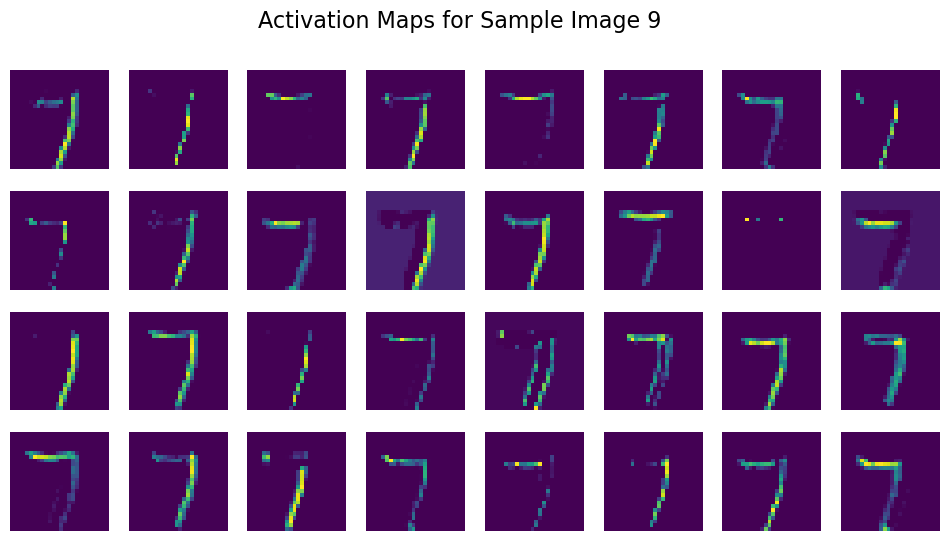

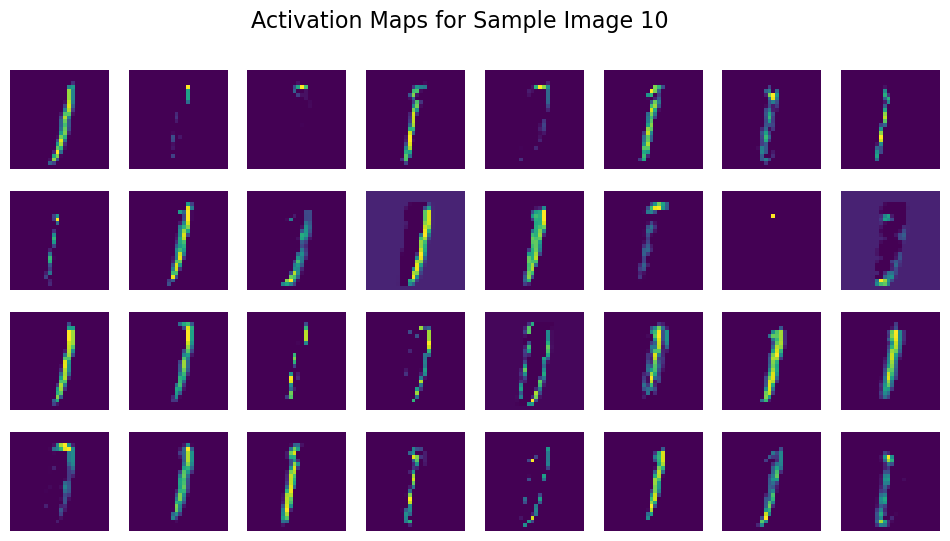

In [33]:
# Extract the output of the first convolutional layer
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(sample_images)

# Plot the activation maps for the first convolutional layer
num_filters = 32  
for i in range(num_samples):
    plt.figure(figsize=(12, 6))
    for j in range(num_filters):
        plt.subplot(4, 8, j + 1)
        plt.imshow(activations[0][i, :, :, j], cmap='viridis')  
        plt.axis('off')
    plt.suptitle(f'Activation Maps for Sample Image {i+1}', fontsize=16)
    plt.show()